# <span style = "color: green" >Simple Linear Regression Project (Gold Price Prediction) </span>

***

Of all the precious metals, gold is the most popular as an investment. Investors generally buy gold as a way of diversifying risk, especially through the use of futures contracts and derivatives. The gold market is subject to speculation and volatility as are other markets. Compared to other precious metals used for investment, gold has been the most effective safe haven across a number of countries.<br><br>
The Dataset contain gold prices (in USD) from 2001 to 2019.
Our goal is to predict where the gold prices will be in the coming years

#### Import the necessary libraries

In [1]:
import pandas as pd

#### Read 'gold_price_usd.csv' & store it in a variable

In [3]:
df=pd.read_csv('gold_price_usd.csv')
df

,Date,USD (AM)
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60
...,...,...
4713,2019-08-27,1531.85
4714,2019-08-28,1541.75
4715,2019-08-29,1536.65
4716,2019-08-30,1526.55


#### View the first 5 rows

In [4]:
df.head(5)

,Date,USD (AM)
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60


#### Check the information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4718 non-null   object 
 1   USD (AM)  4718 non-null   float64
dtypes: float64(1), object(1)
memory usage: 73.8+ KB


#### Find the columns

In [6]:
df.columns

Index(['Date', 'USD (AM)'], dtype='object')

#### Rename USD (AM) to Price

In [7]:
df.rename(columns={'USD (AM)':'Price'},inplace='True')
df

,Date,Price
0,2001-01-02,272.80
1,2001-01-03,269.00
2,2001-01-04,268.75
3,2001-01-05,268.00
4,2001-01-08,268.60
...,...,...
4713,2019-08-27,1531.85
4714,2019-08-28,1541.75
4715,2019-08-29,1536.65
4716,2019-08-30,1526.55


#### Check if there are any missing values in the dataset

In [8]:
df.isna().sum()

Date     0
Price    0
dtype: int64

#### Gather the basic statistical information about the dataset

In [9]:
df.describe()

,Price
count,4718.000000
mean,959.990812
std,449.456217
min,256.700000
25%,449.112500
50%,1113.125000
75%,1293.750000
max,1896.500000


#### Convert Date column from object to datetime format

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4718 non-null   object 
 1   Price   4718 non-null   float64
dtypes: float64(1), object(1)
memory usage: 73.8+ KB



#### Create a new column with Year

In [11]:
Year=df['Date'].str[:4]
df['Year']=Year
df.head()

,Date,Price,Year
0,2001-01-02,272.80,2001
1,2001-01-03,269.00,2001
2,2001-01-04,268.75,2001
3,2001-01-05,268.00,2001
4,2001-01-08,268.60,2001


#### Create a new column with Months

In [12]:
Month=df['Date'].str[5:7]
df['Month']=Month
df.head()

,Date,Price,Year,Month
0,2001-01-02,272.80,2001,01
1,2001-01-03,269.00,2001,01
2,2001-01-04,268.75,2001,01
3,2001-01-05,268.00,2001,01
4,2001-01-08,268.60,2001,01


#### See all the years and Months in our dataset

In [13]:
import numpy as np

In [14]:
Year.unique()


array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019'], dtype=object)

In [15]:
#Years

In [16]:
Month.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

## <span style = "color: orange" >Visualization</span>

### Create a regression plot with x-axis as years and y-axis as Price

In [17]:
import matplotlib .pyplot as plt
import seaborn as sns 

In [18]:
df.head()

,Date,Price,Year,Month
0,2001-01-02,272.80,2001,01
1,2001-01-03,269.00,2001,01
2,2001-01-04,268.75,2001,01
3,2001-01-05,268.00,2001,01
4,2001-01-08,268.60,2001,01


<AxesSubplot:xlabel='Year', ylabel='Price'>

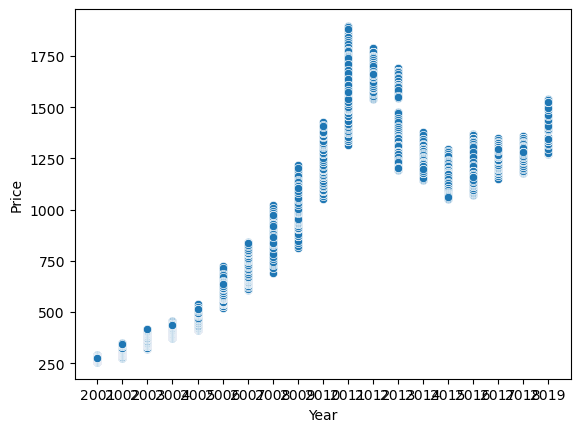

In [19]:
sns.scatterplot(x=df['Year'],y=df['Price'])

### Plot a histplot to find the variation in price

<AxesSubplot:xlabel='Price', ylabel='Count'>

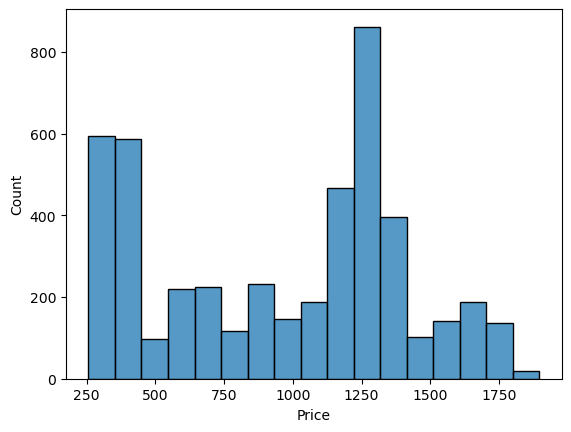

In [20]:
sns.histplot(data=df,x='Price')

### Assign year and price in x and y variables

In [21]:
X = df[['Year']]
y = df['Price']

### Split the data into traning and testin set

We will train our model on the training set and then use the test set to evaluate the model

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [24]:
print(X_train.shape)

(3774, 1)


In [25]:
print(X_test.shape) 

(944, 1)





### Create Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [27]:
model=LinearRegression()

### Train the  model

In [28]:
model.fit(X_train,y_train)

model.score(X_train,y_train)

0.7062195587705216

In [29]:
print(model.coef_)
print(model.intercept_)

[70.25642838]
-140243.2368812509


### Check the score of our model

In [30]:
model.fit(X_train,y_train)

LinearRegression()

### Check the coefficient and Intercept

In [31]:
print(model.coef_)
print(model.intercept_)

[70.25642838]
-140243.2368812509


### Make Prediction with Test data

In [34]:
y_pred=model.predict(X_test)
len(y_pred)

944

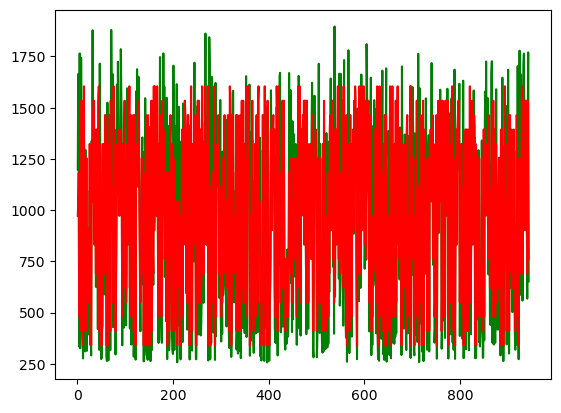

In [35]:
c =[i for i in range(1,945)]
plt.plot(c,y_test,color='green')
plt.plot(c,y_pred,color='red')

In [36]:
y_pred=model.predict(X_test)

In [37]:
y_pred

array([ 972.1841619 , 1042.44059028, 1182.95344704,  480.38916324,
       1112.69701866,  410.13273486,  761.41487676, 1112.69701866,
       1534.23558894,  831.67130514,  550.64559162,  339.87630648,
       1323.4663038 , 1604.49201732,  550.64559162,  410.13273486,
       1253.20987542,  410.13273486, 1253.20987542,  410.13273486,
        901.92773352,  550.64559162,  550.64559162,  831.67130514,
        620.90202   , 1323.4663038 ,  410.13273486,  550.64559162,
        339.87630648, 1042.44059028, 1182.95344704, 1042.44059028,
       1463.97916056, 1534.23558894, 1534.23558894,  831.67130514,
       1323.4663038 ,  972.1841619 ,  691.15844838, 1393.72273218,
       1253.20987542, 1323.4663038 ,  620.90202   , 1534.23558894,
       1604.49201732,  410.13273486, 1112.69701866, 1323.4663038 ,
       1253.20987542,  339.87630648,  339.87630648,  620.90202   ,
        620.90202   , 1323.4663038 ,  761.41487676,  691.15844838,
        691.15844838, 1463.97916056, 1463.97916056, 1323.46630

In [38]:
len(y_pred)

944

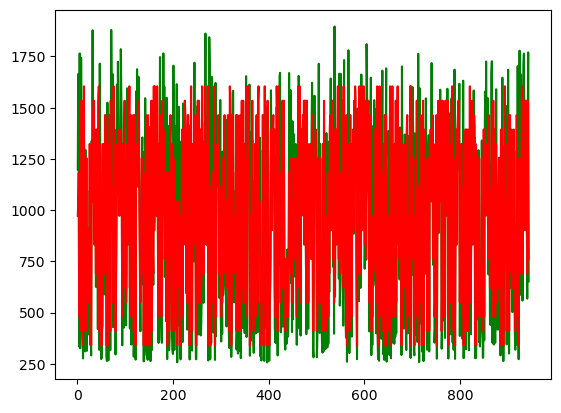

In [39]:
c=[i for i in range (1,945)]
plt.plot(c,y_test,color='green')
plt.plot(c,y_pred,color='red')

<AxesSubplot:ylabel='Price'>

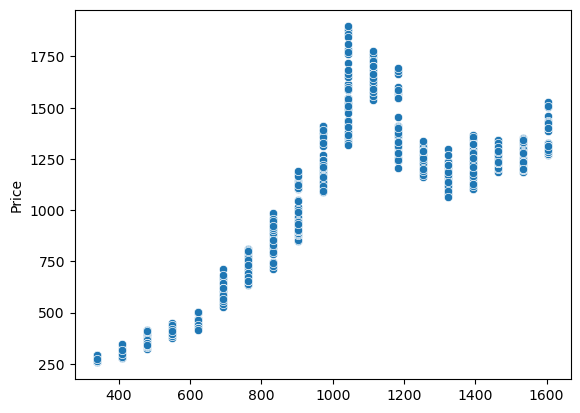

In [40]:
sns.scatterplot(x=y_pred,y=y_test)


### Create a new dataframe with actual and predicted values with year(X_test) as index

In [41]:
data= {'X':['Y_test'], 'Y':['Y_pred']}

In [42]:
dt=pd.DataFrame(data,index=['X_test'])
dt

,X,Y
X_test,Y_test,Y_pred


### Check the mean absolute error, mean square error

In [43]:
from sklearn.metrics import mean_squared_error,r2_score

In [44]:
mean_squared_error(y_test,y_pred)

57363.115877681754

In [45]:
r2_score(y_test,y_pred)

0.7117520829948503